In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target']=iris.target
df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)

In [6]:
df

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


## Actual Data Points

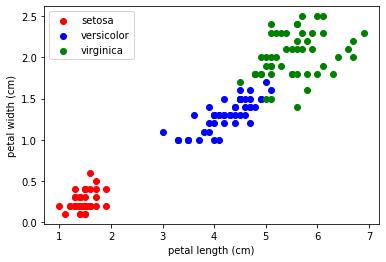

In [7]:
d1=df[df.target==0]
d2=df[df.target==1]
d3=df[df.target==2]

plt.scatter(d1['petal length (cm)'],d1['petal width (cm)'],color='red',label=iris.target_names[0])
plt.scatter(d2['petal length (cm)'],d2['petal width (cm)'],color='blue',label=iris.target_names[1])
plt.scatter(d3['petal length (cm)'],d3['petal width (cm)'],color='green',label=iris.target_names[2])

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()


In [8]:
km=KMeans(n_clusters=3)

In [9]:
y_predicted=km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
df['cluster']=y_predicted

## Clustering Without scaling the data

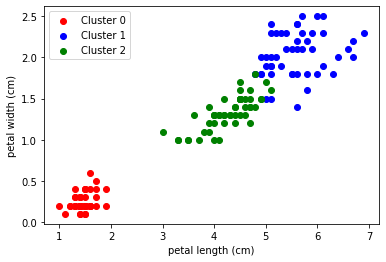

In [11]:
d1=df[df.cluster==0]
d2=df[df.cluster==1]
d3=df[df.cluster==2]

plt.scatter(d1['petal length (cm)'],d1['petal width (cm)'],color='red',label='Cluster 0')
plt.scatter(d2['petal length (cm)'],d2['petal width (cm)'],color='blue',label='Cluster 1')
plt.scatter(d3['petal length (cm)'],d3['petal width (cm)'],color='green',label='Cluster 2')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

## Scaling Data

In [12]:
scaler=MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']])

df

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,1
146,0.677966,0.750000,2,1
147,0.711864,0.791667,2,1
148,0.745763,0.916667,2,1


In [13]:
km=KMeans(n_clusters=3)
predicted=km.fit_predict(df)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
df['cluster']=predicted
df

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,2
146,0.677966,0.750000,2,2
147,0.711864,0.791667,2,2
148,0.745763,0.916667,2,2


## Clustering With scaling of the data

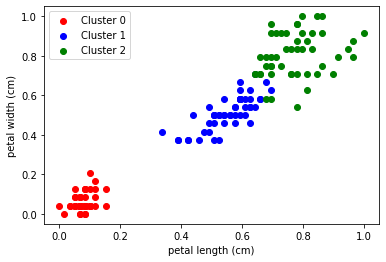

In [15]:
d1=df[df.cluster==0]
d2=df[df.cluster==1]
d3=df[df.cluster==2]

plt.scatter(d1['petal length (cm)'],d1['petal width (cm)'],color='red',label='Cluster 0')
plt.scatter(d2['petal length (cm)'],d2['petal width (cm)'],color='blue',label='Cluster 1')
plt.scatter(d3['petal length (cm)'],d3['petal width (cm)'],color='green',label='Cluster 2')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [16]:
sse=[]
krng=range(1,10)
for i in krng:
    km=KMeans(n_clusters=i)
    km.fit_predict(df)
    sse.append(km.inertia_)

## Elbow Plot

Text(0, 0.5, 'Sum of squared error')

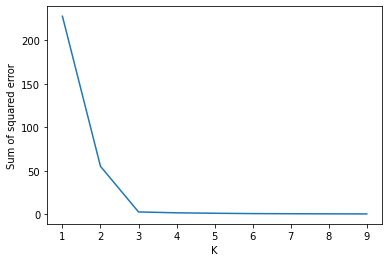

In [17]:
plt.plot(krng,sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')

### Optimal Value for Number of clusters=3